In [124]:
#-------------------------------------------------Data Preperation Step
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cm import get_cmap
from matplotlib.colors import Normalize
%matplotlib notebook

#Data Cleaning and Preperation
housing_pak_df = pd.read_csv('Zameen Property Data.csv')
housing_pak_df = housing_pak_df.drop(['agency', 'agent'], axis=1) 

#Removing outlying data keeping in mind pakistans long and lats
#Northernmost point of Pakistan latitude is 37°06' N
#Southmost point of Pakistan latitude is 23°42' N
#Easternmost longitude point is 77°30' E.
#Westmost longitude point is 61°00' E
housing_pak_df = housing_pak_df[(housing_pak_df['latitude']<37) & (housing_pak_df['latitude']>23) & (housing_pak_df['longitude']<78) & (housing_pak_df['longitude']>61)]

#Filtering only houses that are available for rent

#Converting house size to sq yards
housing_pak_df['Area'] =housing_pak_df['area'].str.split(" ",expand=True)[0]
housing_pak_df['Unit'] = housing_pak_df['area'].str.split(" ",expand=True)[1]
housing_pak_df = housing_pak_df.drop(['area'], axis=1)
housing_pak_df['Area'] = housing_pak_df[['Area']].apply(lambda x: x.str.replace(',',''))
#1 Marla is 30.2501 sq yards
#1 Kanal is 605 sq yards
housing_pak_df['Area'] = housing_pak_df['Area'].astype(float)
housing_pak_df['price'] = housing_pak_df['price'].astype(float)
housing_pak_df['Area in sq yards'] = housing_pak_df['Area']*housing_pak_df['Unit'].apply(lambda x: 605 if x=='Kanal' else 30.2501)
housing_pak_df['Area in sq yards'] = housing_pak_df['Area in sq yards'].round(0)
housing_pak_df = housing_pak_df.drop(['Area', 'Unit'], axis=1)

#Converting price to from PKR USD
housing_pak_df['price'] = housing_pak_df['price']*0.006

#Converting bedroom and bathroom number data to int
housing_pak_df['bedrooms'] = housing_pak_df['bedrooms'].astype(int)
housing_pak_df['baths'] = housing_pak_df['baths'].astype(int)

housing_pak_df['property_type'] = housing_pak_df[['property_type']].apply(lambda x: x.str.replace('Lower Portion','Portion'))
housing_pak_df['property_type'] = housing_pak_df[['property_type']].apply(lambda x: x.str.replace('Upper Portion','Portion'))

In [131]:
#-----------------------------------------------Karachi Housing Data
#Removing incomplete and erroneous data
housing_khi_df= housing_pak_df[(housing_pak_df['city']=='Karachi') & (housing_pak_df['bedrooms']<30) & (housing_pak_df['bedrooms']>0) ]
#Seperating for rent and for sale data
rent_housing_khi_df = housing_khi_df[housing_khi_df['purpose'] == 'For Rent']
rent_housing_khi_df = rent_housing_khi_df[(rent_housing_khi_df['price'] >= 10) & (rent_housing_khi_df['price'] <= 60000) & (rent_housing_khi_df['Area in sq yards'] <= 20000)]
purchase_housing_khi_df = housing_khi_df[housing_khi_df['purpose'] == 'For Sale']
purchase_housing_khi_df = purchase_housing_khi_df[purchase_housing_khi_df['Area in sq yards'] <= 50000]

#-----------------------------------------------Islamabad Housing Data
#Removing incomplete and erroneous data
housing_isb_df= housing_pak_df[(housing_pak_df['city']=='Islamabad') & (housing_pak_df['bedrooms']<30) & (housing_pak_df['bedrooms']>0) ]
#Seperating for rent and for sale data
rent_housing_isb_df = housing_isb_df[housing_isb_df['purpose'] == 'For Rent']
rent_housing_isb_df = rent_housing_isb_df[(rent_housing_isb_df['price'] >= 10) & (rent_housing_isb_df['price'] <= 60000) & (rent_housing_isb_df['Area in sq yards'] <= 20000)]
purchase_housing_isb_df = housing_isb_df[housing_isb_df['purpose'] == 'For Sale']
purchase_housing_isb_df = purchase_housing_isb_df[purchase_housing_isb_df['Area in sq yards'] <= 50000]

#-----------------------------------------------Rawalpindi Housing Data
#Removing incomplete and erroneous data
housing_rwp_df= housing_pak_df[(housing_pak_df['city']=='Rawalpindi') & (housing_pak_df['bedrooms']<30) & (housing_pak_df['bedrooms']>0) ]
#Seperating for rent and for sale data
rent_housing_rwp_df = housing_rwp_df[housing_rwp_df['purpose'] == 'For Rent']
rent_housing_rwp_df = rent_housing_rwp_df[(rent_housing_rwp_df['price'] >= 10) & (rent_housing_rwp_df['price'] <= 60000) & (rent_housing_rwp_df['Area in sq yards'] <= 20000)]
purchase_housing_rwp_df = housing_rwp_df[housing_rwp_df['purpose'] == 'For Sale']
purchase_housing_rwp_df = purchase_housing_rwp_df[purchase_housing_rwp_df['Area in sq yards'] <= 50000]

#-----------------------------------------------Lahore Housing Data
#Removing incomplete and erroneous data
housing_lhr_df= housing_pak_df[(housing_pak_df['city']=='Lahore') & (housing_pak_df['bedrooms']<30) & (housing_pak_df['bedrooms']>0) ]
#Seperating for rent and for sale data
rent_housing_lhr_df = housing_lhr_df[housing_lhr_df['purpose'] == 'For Rent']
rent_housing_lhr_df = rent_housing_lhr_df[(rent_housing_lhr_df['price'] >= 1000) & (rent_housing_lhr_df['price'] <= 10000000) & (rent_housing_lhr_df['Area in sq yards'] <= 20000)]
purchase_housing_lhr_df = housing_lhr_df[housing_lhr_df['purpose'] == 'For Sale']
purchase_housing_lhr_df = purchase_housing_lhr_df[purchase_housing_lhr_df['Area in sq yards'] <= 50000]

GINI = pd.read_csv('Paper-1-Determinants-of-Earnings-A-District-Wise-by-Khola-Khan-and-Muhammad-Idrees.csv')
GINI=GINI[['City','Gini Coefficient']]

cmap = get_cmap('coolwarm')
color_grad = [cmap(x) for x in GINI['Gini Coefficient']] # Assign colour depending on norm value.
GINI

,City,Gini Coefficient
0,Karachi,0.469
1,Islamabad,0.482
2,Rawalpindi,0.477
3,Lahore,0.553
4,Faisalabad,0.491


<IPython.core.display.Javascript object>


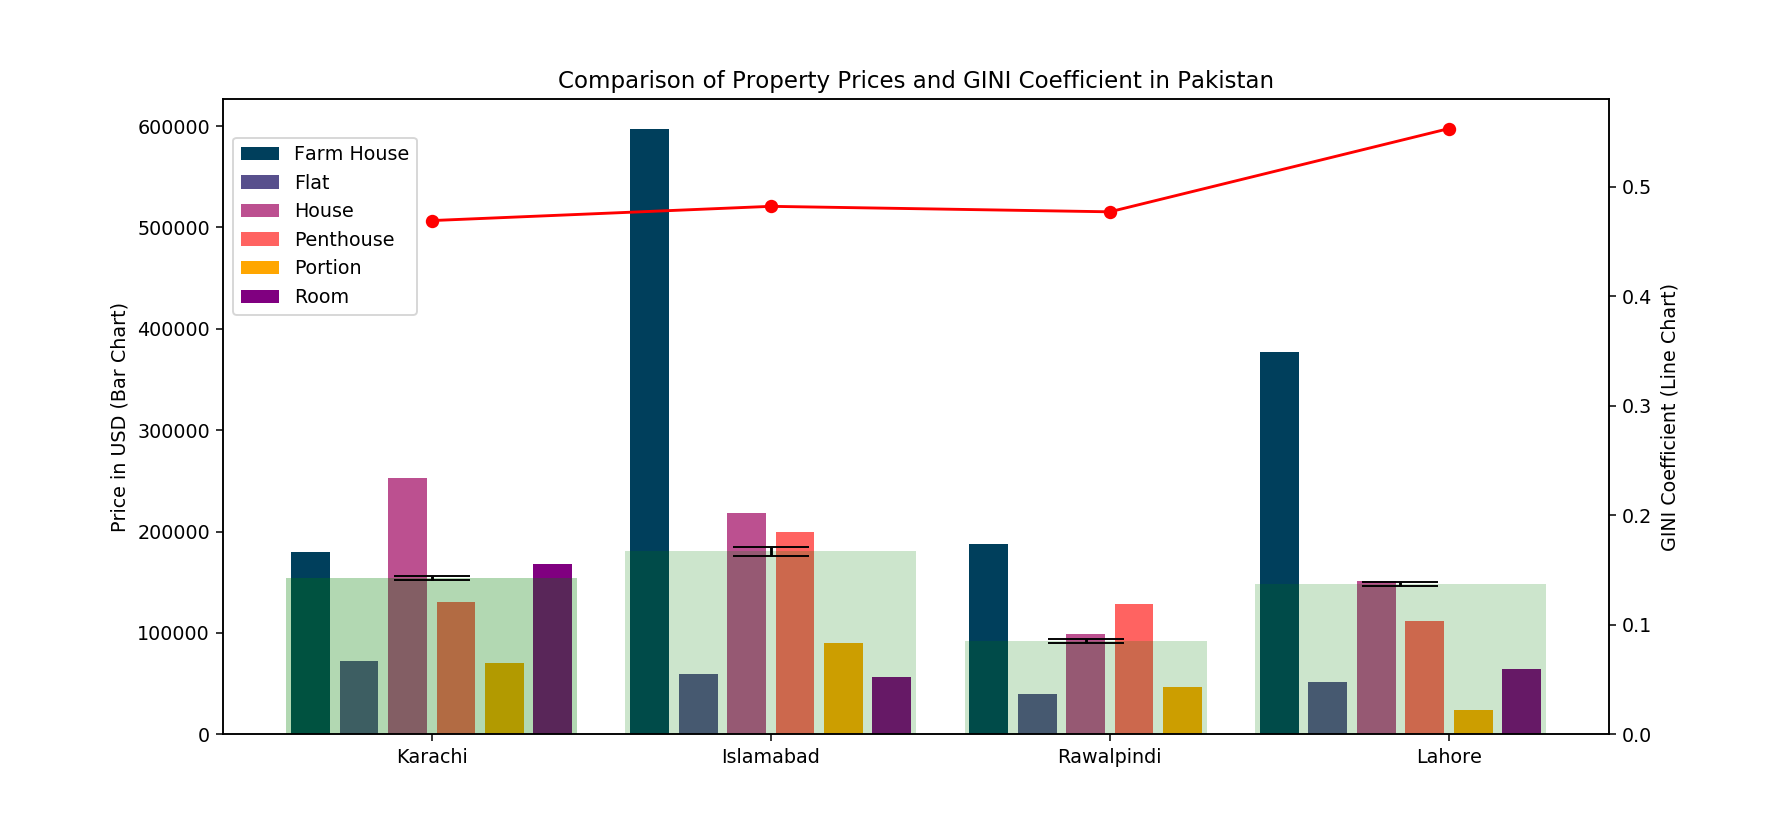

In [186]:
#------------------------------------------------Plotting the graph
GINI = pd.read_csv('Paper-1-Determinants-of-Earnings-A-District-Wise-by-Khola-Khan-and-Muhammad-Idrees.csv')
GINI=GINI[['City','Gini Coefficient']]

df1 = purchase_housing_khi_df.groupby('property_type').mean()[['price']]
df1['Property Type'] = df1.index

df2 = purchase_housing_isb_df.groupby('property_type').mean()[['price']]
df2['Property Type'] = df2.index

df3 = purchase_housing_rwp_df.groupby('property_type').mean()[['price']]
df3['Property Type'] = df3.index

df4 = purchase_housing_lhr_df.groupby('property_type').mean()[['price']]
df4['Property Type'] = df4.index

f, ax = plt.subplots(1,1, sharex=True, sharey=True,figsize=(13, 6))
colors = {'Farm House':'#003f5c', 'Flat':'#58508d', 'House':'#bc5090','Penthouse':'#ff6361','Portion':'#ffa600','Room':'purple'}
c = df1['Property Type'].apply(lambda x: colors[x])
length = np.arange(len(df2['price']))

error_khi=purchase_housing_khi_df['price'].std()*1.96/np.sqrt(purchase_housing_khi_df['price'].count())
ax.bar(np.arange(len(df2['price'])),df1['price'], color=c)
ax.bar(2.5, purchase_housing_khi_df['price'].mean(), yerr = error_khi, color='g', width=6, alpha=0.3,capsize=20)

error_isb=purchase_housing_isb_df['price'].std()*1.96/np.sqrt(purchase_housing_isb_df['price'].count())
ax.bar(np.arange(len(df2['price'])+1,1+2*len(df2['price'])),df2['price'], color=c)
ax.bar(len(df2['price'])+3.5, purchase_housing_isb_df['price'].mean(), yerr=error_isb, color='g', width=6, alpha=0.2,capsize=20)
#ax.text(1, purchase_housing_isb_df['price'].mean()+10000, str(purchase_housing_isb_df['price'].mean().round(0)))

error_rwp=purchase_housing_rwp_df['price'].std()*1.96/np.sqrt(purchase_housing_rwp_df['price'].count())
ax.bar(np.arange(len(df2['price'])*2+2,3*len(df2['price'])+1),df3['price'], color=c)
ax.bar(len(df2['price'])*2+4, purchase_housing_rwp_df['price'].mean(), yerr=error_rwp, color='g', width=5, alpha=0.2,capsize=20)

error_lhr=purchase_housing_lhr_df['price'].std()*1.96/np.sqrt(purchase_housing_lhr_df['price'].count())
ax.bar(np.arange(len(df2['price'])*3+2,4*len(df2['price'])+2),df4['price'], color=c)
ax.bar(len(df2['price'])*3+4.5, purchase_housing_lhr_df['price'].mean(), yerr=error_lhr, color='g', width=6, alpha=0.2, capsize=20)
ax.set_title('Comparison of Property Prices and GINI Coefficient in Pakistan')

ax2=ax.twinx()
ax2.plot(np.arange(2.5,28,7),GINI['Gini Coefficient'].iloc[0:4], '-or')
ax2.set_ylim(0,0.58)
ax2.set_ylabel(r'GINI Coefficient (Line Chart)')
ax.set_ylabel(r'Price in USD (Bar Chart)')

#print(ax)

#Creating legend
for i, j in colors.items(): #Loop over color dictionary
    ax.bar(np.arange(len(df1['price'])),df1['price'], width=0,color=j,label=i)

legend_x = 0
legend_y = 0.8
ax.legend(loc='center left', bbox_to_anchor=(legend_x, legend_y))

plt.xticks(np.arange(2.5,28,7), ('Karachi', 'Islamabad', 'Rawalpindi', 'Lahore'))

plt.savefig('answer.png')

<IPython.core.display.Javascript object>


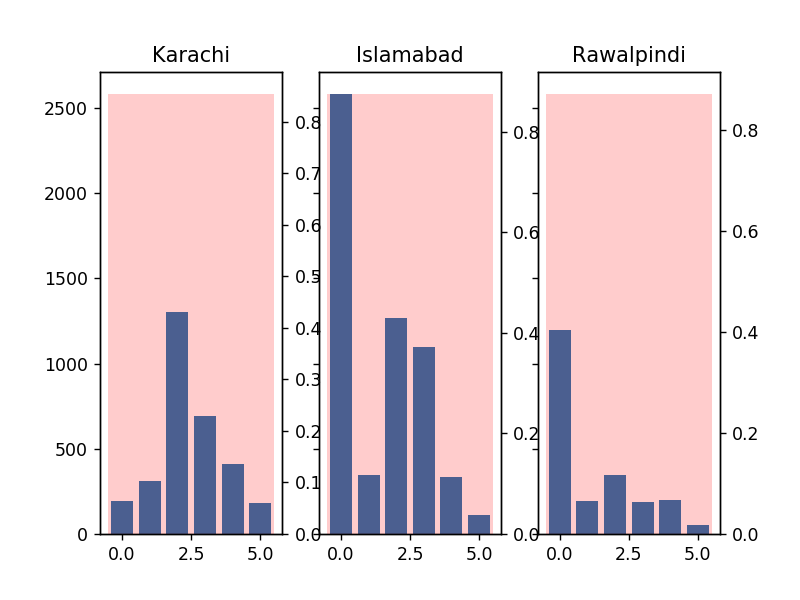

Text(0.5, 1.0, 'Rawalpindi')

In [113]:
'''HDI_pak_df = pd.read_csv('HDI Data Pakistan.csv')

df1 = rent_housing_khi_df.groupby('property_type').mean()[['price']]
df1['Property Type'] = df1.index

df2 = rent_housing_isb_df.groupby('property_type').mean()[['price']]
df2['Property Type'] = df2.index

df3 = rent_housing_rwp_df.groupby('property_type').mean()[['price']]
df3['Property Type'] = df3.index

f, (ax1, ax2, ax3) = plt.subplots(1,3, sharex=True, sharey=True)

ax1.bar(np.arange(len(df1['price'])),df1['price'])
#[i+0.25*0.8 for i in np.arange(len(df1['price']))], 
ax1b = ax1.twinx()
ax1b.bar(2.5, HDI_pak_df[HDI_pak_df['City']=='Karachi']['2015'], color='r', width=6, alpha=0.2)
ax1.set_title('Karachi')

ax2.bar(np.arange(len(df2['price'])),df2['price'])
ax2b = ax2.twinx()
ax2b.bar(2.5, HDI_pak_df[HDI_pak_df['City']=='Islamabad']['2015'], color='r', width=6, alpha=0.2)
ax2.set_title('Islamabad')

ax3.bar(np.arange(len(df3['price'])),df3['price'])
ax3b = ax3.twinx()
ax3b.bar(2.5, HDI_pak_df[HDI_pak_df['City']=='Rawalpindi']['2015'], color='r', width=6, alpha=0.2)

ax3.set_title('Rawalpindi')'''

property_type
Farm House    Farm House
Flat                Flat
House              House
Penthouse      Penthouse
Portion          Portion
Room                Room
Name: Property Type, dtype: object


<IPython.core.display.Javascript object>


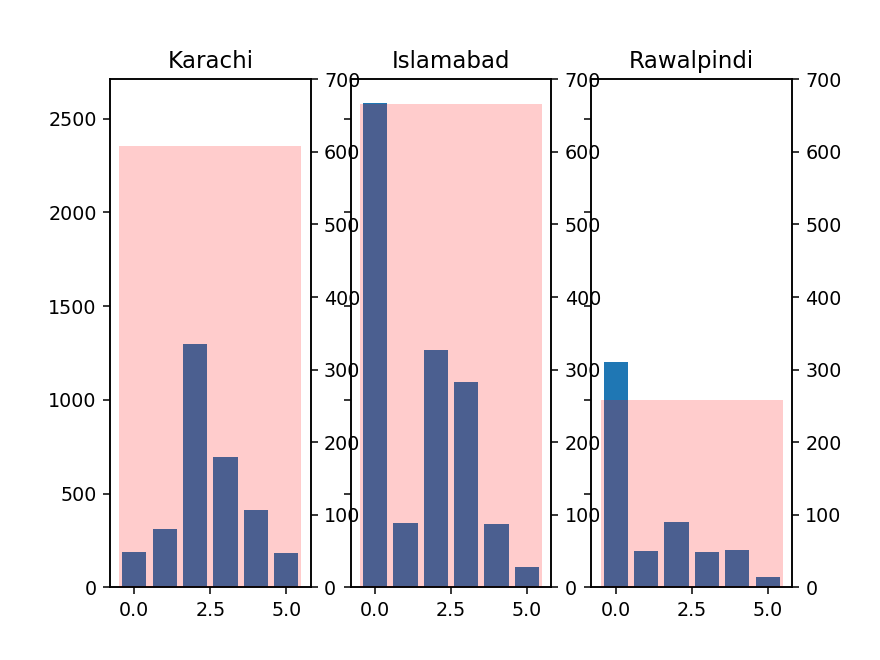

Text(0.5, 1.0, 'Rawalpindi')

In [7]:
'''HDI_pak_df = pd.read_csv('HDI Data Pakistan.csv')

df1 = rent_housing_khi_df.groupby('property_type').mean()[['price']]
df1['Property Type'] = df1.index

print(df1['Property Type'])

df2 = rent_housing_isb_df.groupby('property_type').mean()[['price']]
df2['Property Type'] = df2.index

df3 = rent_housing_rwp_df.groupby('property_type').mean()[['price']]
df3['Property Type'] = df3.index

f, (ax1, ax2, ax3) = plt.subplots(1,3, sharex=True, sharey=True)

ax1.bar(np.arange(len(df1['price'])),df1['price'])
#[i+0.25*0.8 for i in np.arange(len(df1['price']))], 
ax1b = ax1.twinx()
ax1b.bar(2.5, rent_housing_khi_df['price'].mean(), color='r', width=6, alpha=0.2)
ax1b.set_ylim(0,700)
ax1.set_title('Karachi')

ax2.bar(np.arange(len(df2['price'])),df2['price'])
ax2b = ax2.twinx()
ax2b.bar(2.5, rent_housing_isb_df['price'].mean(), color='r', width=6, alpha=0.2)
ax2b.set_ylim(0,700)

ax2.set_title('Islamabad')

ax3.bar(np.arange(len(df3['price'])),df3['price'])
ax3b = ax3.twinx()
ax3b.bar(2.5, rent_housing_rwp_df['price'].mean(), color='r', width=6, alpha=0.2)
ax3b.set_ylim(0,700)

ax1b.get_shared_y_axes().join(ax1b, ax2b, ax3b)

ax3.set_title('Rawalpindi')'''

<IPython.core.display.Javascript object>


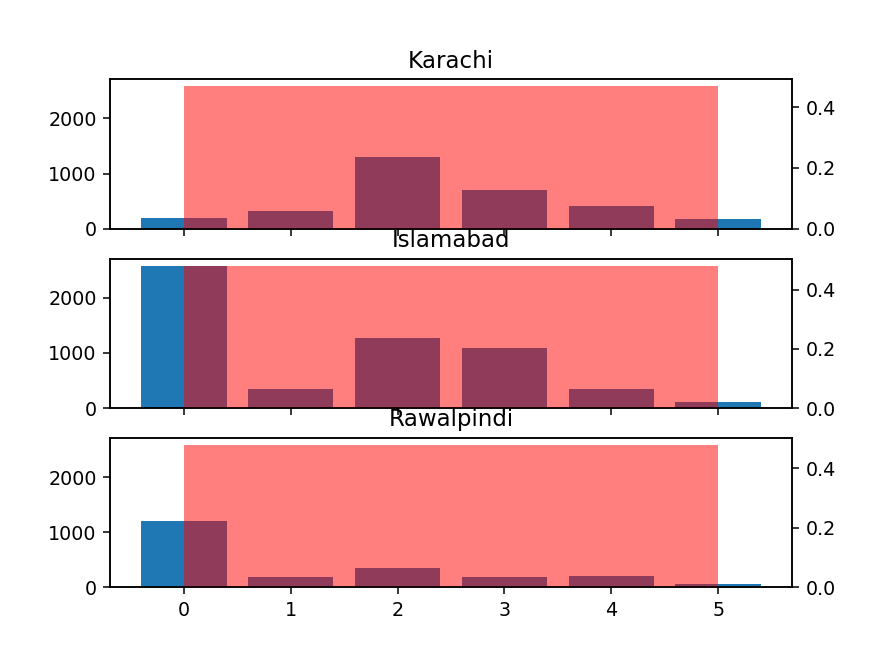

,City,Average Earnings,Gini Coefficient
0,Karachi,14408.81,0.469
1,Islamabad,14684.96,0.482
2,Rawalpindi,13784.99,0.477
3,Lahore,14506.46,0.553
4,Faisalabad,13295.67,0.491


In [6]:
'''cities_wealth_df = pd.read_csv('Paper-1-Determinants-of-Earnings-A-District-Wise-by-Khola-Khan-and-Muhammad-Idrees.csv')


HDI_pak_df = pd.read_csv('HDI Data Pakistan.csv')

df1 = rent_housing_khi_df.groupby('property_type').mean()[['price']]
df1['Property Type'] = df1.index

df2 = rent_housing_isb_df.groupby('property_type').mean()[['price']]
df2['Property Type'] = df2.index

df3 = rent_housing_rwp_df.groupby('property_type').mean()[['price']]
df3['Property Type'] = df3.index

f, (ax1, ax2, ax3) = plt.subplots(3,1, sharex=True, sharey=True)

ax1.bar(np.arange(len(df1['price'])),df1['price'])
#[i+0.25*0.8 for i in np.arange(len(df1['price']))], 
ax1b = ax1.twinx()
ax1b.bar(2.5, cities_wealth_df[cities_wealth_df['City']=='Karachi']['Gini Coefficient'], color='r', width=5, alpha=0.5)
ax1.set_title('Karachi')

ax2.bar(np.arange(len(df2['price'])),df2['price'])
ax2b = ax2.twinx()
ax2b.bar(2.5, cities_wealth_df[cities_wealth_df['City']=='Islamabad']['Gini Coefficient'], color='r', width=5, alpha=0.5)
ax2.set_title('Islamabad')

ax3.bar(np.arange(len(df3['price'])),df3['price'])
ax3b = ax3.twinx()
ax3b.bar(2.5, cities_wealth_df[cities_wealth_df['City']=='Rawalpindi']['Gini Coefficient'], color='r', width=5, alpha=0.5)

ax3.set_title('Rawalpindi')

cities_wealth_df
'''

<IPython.core.display.Javascript object>


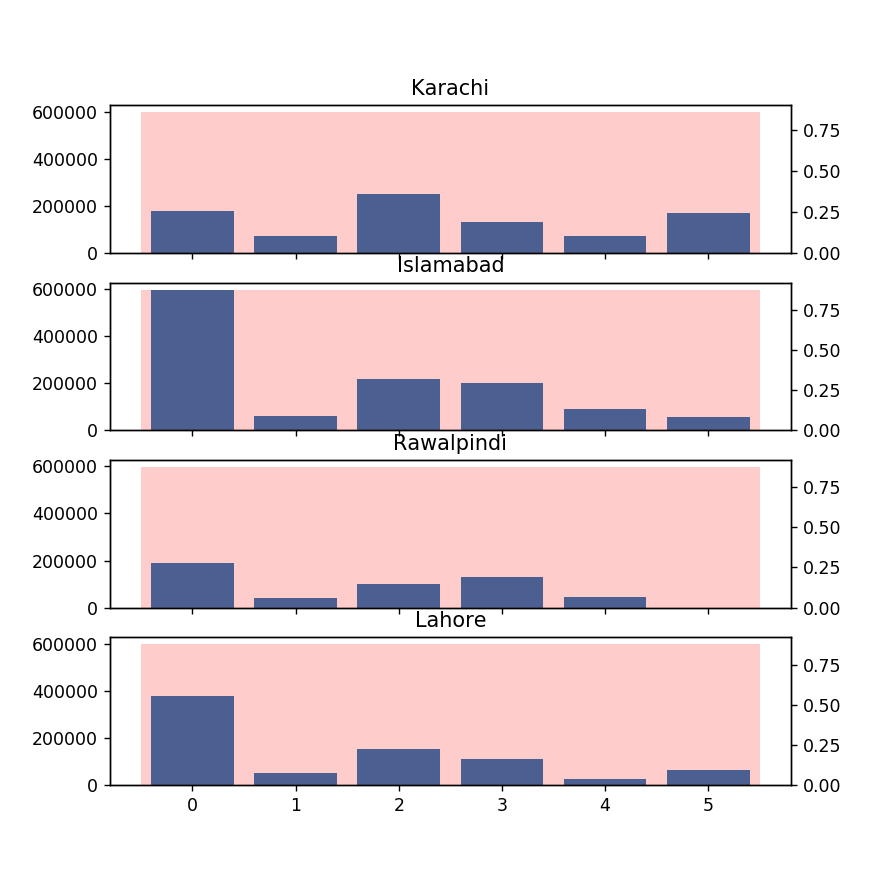

Text(0.5, 1.0, 'Lahore')

In [117]:
'''HDI_pak_df = pd.read_csv('HDI Data Pakistan.csv')

df1 = purchase_housing_khi_df.groupby('property_type').mean()[['price']]
df1['Property Type'] = df1.index

df2 = purchase_housing_isb_df.groupby('property_type').mean()[['price']]
df2['Property Type'] = df2.index

df3 = purchase_housing_rwp_df.groupby('property_type').mean()[['price']]
df3['Property Type'] = df3.index

df4 = purchase_housing_lhr_df.groupby('property_type').mean()[['price']]
df4['Property Type'] = df4.index

f, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, sharex=True, sharey=True)

ax1.bar(np.arange(len(df1['price'])),df1['price'])
ax1b = ax1.twinx()
ax1b.bar(2.5, HDI_pak_df[HDI_pak_df['City']=='Karachi']['2015'], color='r', width=6, alpha=0.2)
ax1.set_title('Karachi')

ax2.bar(np.arange(len(df2['price'])),df2['price'])
ax2b = ax2.twinx()
ax2b.bar(2.5, HDI_pak_df[HDI_pak_df['City']=='Islamabad']['2015'], color='r', width=6, alpha=0.2)
ax2.set_title('Islamabad')

ax3.bar(np.arange(len(df3['price'])),df3['price'])
ax3b = ax3.twinx()
ax3b.bar(2.5, HDI_pak_df[HDI_pak_df['City']=='Rawalpindi']['2015'], color='r', width=6, alpha=0.2)
ax3.set_title('Rawalpindi')

ax4.bar(np.arange(len(df4['price'])),df4['price'])
ax4b = ax4.twinx()
ax4b.bar(2.5, HDI_pak_df[HDI_pak_df['City']=='Lahore']['2015'], color='r', width=6, alpha=0.2)
ax4.set_title('Lahore')

'''

<IPython.core.display.Javascript object>


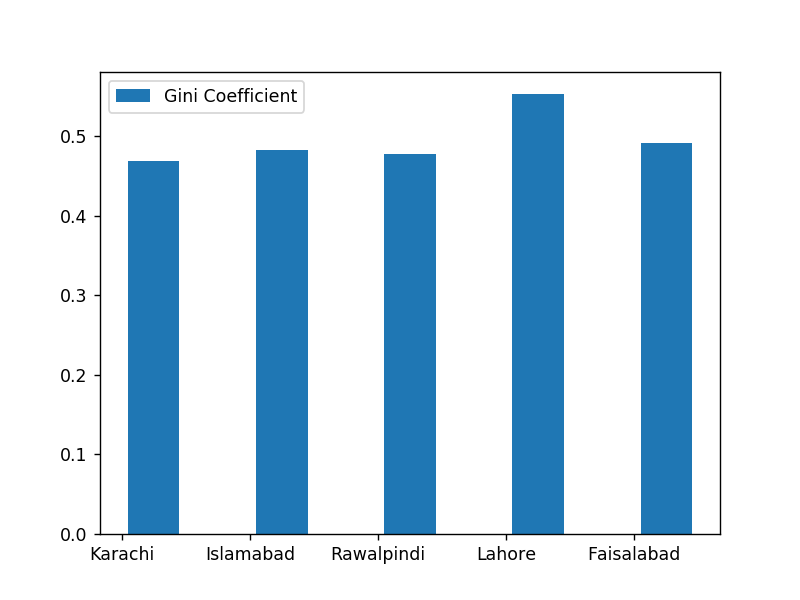

In [79]:
'''cities_wealth_df = pd.read_csv('Paper-1-Determinants-of-Earnings-A-District-Wise-by-Khola-Khan-and-Muhammad-Idrees.csv')
cities_wealth_df['Normed Earnings'] = cities_wealth_df['Average Earnings']/(cities_wealth_df['Average Earnings'].sum())
cities_wealth_df

plt.figure()
#plt.bar(np.arange(0,cities_wealth_df['City'].count()*2,2), cities_wealth_df['Normed Earnings'], label='Normalized Earnings')
plt.bar(np.arange(1,cities_wealth_df['City'].count()*2+1,2), cities_wealth_df['Gini Coefficient'], label='Gini Coefficient')
plt.xticks(np.arange(5)*2+0.5, cities_wealth_df['City'])
plt.legend()'''

In [ ]:
'''#f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True)
fig = plt.figure()
error_khi=rent_housing_khi_df['price'].std()*1.96/np.sqrt(rent_housing_khi_df['price'].count())
plt.bar(['Karachi'], rent_housing_khi_df['price'].mean(),yerr=error_khi, capsize=30, color='r', alpha=0.5)
error_isb=rent_housing_isb_df['price'].std()*1.96/np.sqrt(rent_housing_isb_df['price'].count())
plt.bar(['Islamabad'], rent_housing_isb_df['price'].mean(),yerr=error_isb, capsize=30, color='g', alpha=0.5)
error_rwp=rent_housing_rwp_df['price'].std()*1.96/np.sqrt(rent_housing_rwp_df['price'].count())
plt.bar(['Rawalpindi'], rent_housing_rwp_df['price'].mean(),yerr=error_rwp, capsize=30, color='b', alpha=0.5)
error_lhr=rent_housing_lhr_df['price'].std()*1.96/np.sqrt(rent_housing_lhr_df['price'].count())
plt.bar(['Lahore'], rent_housing_lhr_df['price'].mean(),yerr=error_lhr, capsize=30, color='b', alpha=0.5)
ax = fig.gca()
ax.set_title('Rent Prices')


fig2 = plt.figure()
error_khi=purchase_housing_khi_df['price'].std()*1.96/np.sqrt(purchase_housing_khi_df['price'].count())
plt.bar(['Karachi'], purchase_housing_khi_df['price'].mean(),yerr=error_khi, capsize=30, color='r', alpha=0.5)
error_isb=purchase_housing_isb_df['price'].std()*1.96/np.sqrt(purchase_housing_isb_df['price'].count())
plt.bar(['Islamabad'], purchase_housing_isb_df['price'].mean(),yerr=error_isb, capsize=30, color='g', alpha=0.5)
error_rwp=purchase_housing_rwp_df['price'].std()*1.96/np.sqrt(purchase_housing_rwp_df['price'].count())
plt.bar(['Rawalpindi'], purchase_housing_rwp_df['price'].mean(),yerr=error_rwp, capsize=30, color='b', alpha=0.5)
error_lhr=purchase_housing_lhr_df['price'].std()*1.96/np.sqrt(purchase_housing_lhr_df['price'].count())
plt.bar(['Lahore'], purchase_housing_lhr_df['price'].mean(),yerr=error_lhr, capsize=30, color='y', alpha=0.5)
ax = fig.gca()
ax.set_title('Rent Prices')
'''